
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, November 12th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. 
2. 

# Question 1 - Stochastic Gradient Descent (30 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'Adagrad'. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). (2pts) Report the MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad.

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


3. (5pts) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why?


## Answer 

### 1.

The loss function for a single point $x_i, y_i$ is:
\begin{equation}
E_i(w) = \left( w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3 - y \right)^2
\end{equation}

Let:
\begin{equation}
e_i(w) = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3 - y
\end{equation}

Then:
\begin{align}
E_i(w) = e_i(w)^2 \\
\frac{\partial E_i}{\partial w_0} = 2 e_i(w) \\
\frac{\partial E_i}{\partial w_1} = 2 e_i(w) x_{i1} \\
\frac{\partial E_i}{\partial w_2} = 2 e_i(w) x_{i1}x_{i2} \\
\frac{\partial E_i}{\partial w_3} = 2 e_i(w) x_{i1}^2x_{i2}^2\\
\frac{\partial E_i}{\partial w_3} = 2 e_i(w) x_{i1}^3\\
\end{align}

The update for each element of $w$ is:
\begin{equation}
w_j^{\tau+1} = w_j^{\tau} - \eta \frac{\partial E_i}{\partial w_j}
\end{equation}

### 2.

In [17]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-6
        self.coef = np.zeros(5) #one coef for each of the terms
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum
        
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate * gradient)
    
    def adagrad(self, gradient):
        self.cache = self.cache + (gradient ** 2)
        weight_update = (self.learning_rate/ (np.sqrt(self.cache + self.eps))) * gradient
        self.coef = self.coef - weight_update
    
    def sgd_momentum(self, gradient):
        self.v = (self.mu * self.v) - (self.learning_rate * gradient)
        self.coef = self.coef + self.v
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                X_i = X[i,:]
                e_i = self.linearPredict(X_i) - y[i]
                # Compute gradients
                gradient = (e_i * X_i) + (self.regularization * self.coef)
               
                # Update weights
                if update_rule == 'sgd':
                    self.sgd(gradient)
                if update_rule == 'adagrad':
                    self.adagrad(gradient)
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                if update_rule == 'rmsprop':
                    self.rmsprop(gradient)
   
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        x = np.zeros((X.shape[0], 5))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2) * (X[:,1]**2)
        x[:,4] = X[:,1]**3
        
        return x
        
    def linearPredict(self, X):
        return X.dot(self.coef)

In [18]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

### Using SGD


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in multiply
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in square
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in multiply
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in add


(0.001, 0)
(0.01, 0)
[0.020878097917959082, 0.021781768945026432]


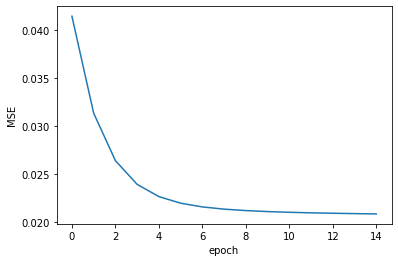

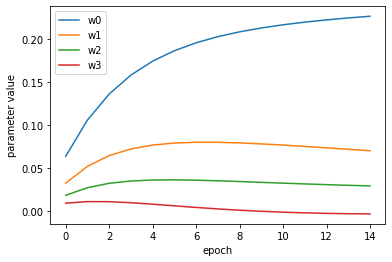

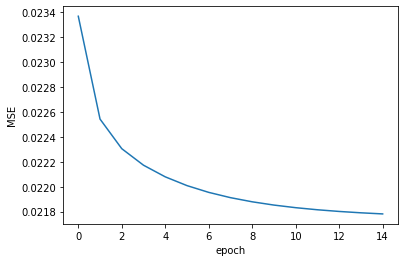

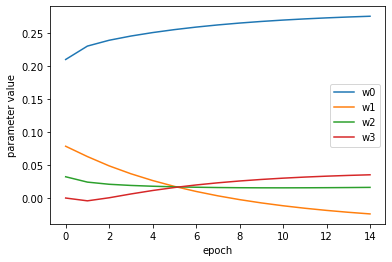

In [19]:
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,plot=False)
    lowest_scores.append(sgd.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
print(hyper[chosen_hyper[0]])
print(hyper[chosen_hyper[1]])
lowest_scores = []
for hyper_iter in chosen_hyper:
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,plot=True)
    lowest_scores.append(sgd.lowest_mse)
print(lowest_scores)

sgd = LinearRegression(.01,0,n_epochs)

In [20]:
#best parameters for sgd
print(chosen_hyper)
print(hyper[3])  #lr
print(hyper[0])  #regularization

[3 6]
(0.001, 0)
(0.0001, 0)


### Using SGD-Momentum

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in square
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in multiply
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in subtract
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in multiply
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in add


[0.020263838535661462, 0.02087046249734365]


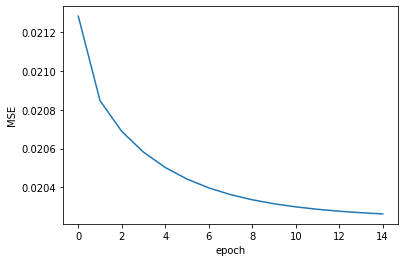

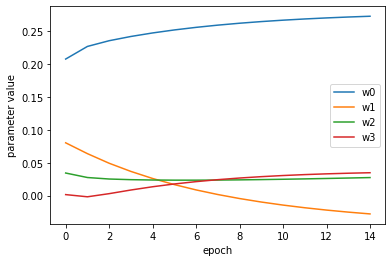

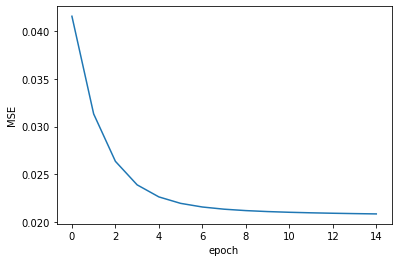

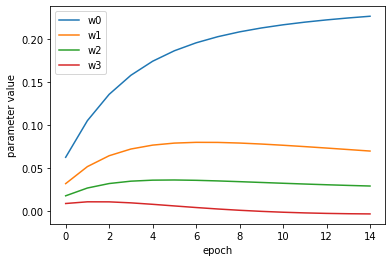

In [21]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,update_rule='sgd_momentum',plot=False)
    lowest_scores.append(sgd.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
lowest_scores = []
for hyper_iter in chosen_hyper:
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,update_rule='sgd_momentum',plot=True)
    lowest_scores.append(sgd.lowest_mse)
print(lowest_scores)

In [22]:
#best parameters for sgd_momentum
print(chosen_hyper)
print(hyper[0])  #lr
print(hyper[1])  #regularization

[3 0]
(0.0001, 0)
(0.0001, 10)


### Using Adagrad

[0.0202349014514659, 0.02101305455442806]


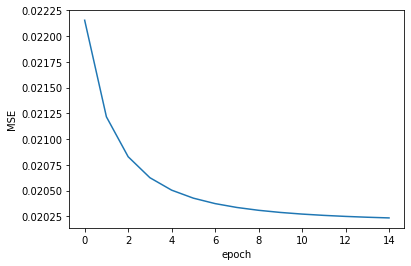

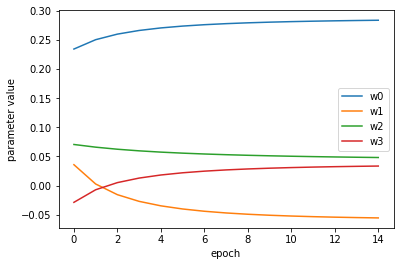

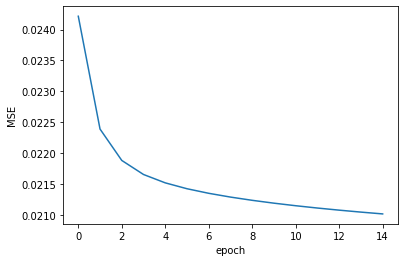

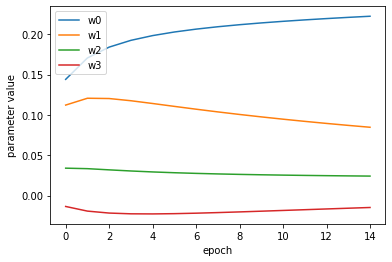

In [23]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,update_rule='adagrad',plot=False)
    lowest_scores.append(sgd.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
lowest_scores = []
for hyper_iter in chosen_hyper:
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,update_rule='adagrad',plot=True)
    lowest_scores.append(sgd.lowest_mse)
print(lowest_scores)

In [24]:
#best parameters for adagrad
print(chosen_hyper)
print(hyper[6])  #lr
print(hyper[9])  #regularization

[9 6]
(0.01, 0)
(0.1, 0)


### 3.
Adagrad allows for high learning rate as it shrinks the learning rate after each update - the learning rate is monotonically decreasing. The effictive learning rate for the $i^{th}$ parameter at time step $t$ is given by 
$$\frac{\eta}{\sqrt{G_{t, i}+\epsilon}}$$ where $G_{t, i}$ is the sum of squares the gradients of the $i^{th}$ parameter upto time step $t$. Hence, the denominator is monotonically 
increasing which results in the learning rate decaying after each update.

# 2.  Tensor Playground (25pts)
Visit http://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the 4th of the four data sets (the spiral data which is bottom right).  

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 10, learning rate 0.03, one hidden layer with 4 neurons, input as X_1, X_2 and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(4 values). What difference do you observe in the decision boundary? Why? (4 pts)

2) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (6 values). What do you observe in the decision boundary as the number of neurons increases? Why? (4 pts)

3) Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 3, 0.3, 0.03 and 0.003 (8 values). What do you observe in the loss curves? Explain. (4 pts)

4) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Use two hidden layers - first hidden layer with 6 neurons and second hidden layer with 4 neurons. Report the train, test values at the end of 2000 epochs (2 values) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. (5 pts).

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be atmost 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  (8 pts)
 

### ANSWER

### 1. 
#### Tanh
Train loss - 0.335
Test loss - 0.421

#### Linear
Train loss - 0.468
Test loss - 0.475


### 2. 

2 neurons - Test loss 0.435 Training loss 0.438

4 neurons - Test loss 0.421 Training loss  0.335 

8 neurons - Test loss 0.259 Training loss 0.205

### 3. 
#### Learning rate 3 
100 epochs - Test loss 0.685 Training loss 0.704 <br />
1000 epochs - Test loss 0.934 Training loss 0.8244 <br />

#### Learning rate 0.3 
100 epochs - Test loss 0.471 Training loss 0.479  <br />
1000 epochs - Test loss 0.450 Training loss 0.381 <br />

#### Learning rate 0.03 
100 epochs - Test loss 0.470 Training loss 0.477 <br />
1000 epochs - Test loss 0.417 Training loss 0.368 <br />

#### Learning rate 0.003 
100 epochs - Test loss 0.476 Training loss 0.482 <br />
1000 epochs - Test loss 0.480 Training loss 0.461 <br />

The training gets more stable as the LR decreases but becomes too slow after a point.


### 4.

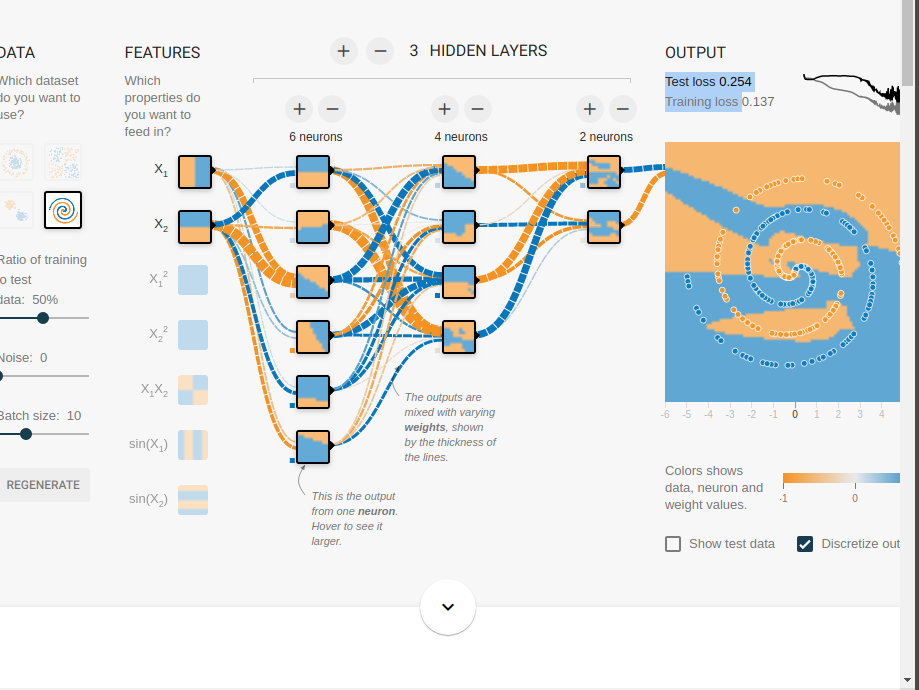

In [96]:
#PART 2
from IPython.display import Image
Image("q2_4.png")

### 5.

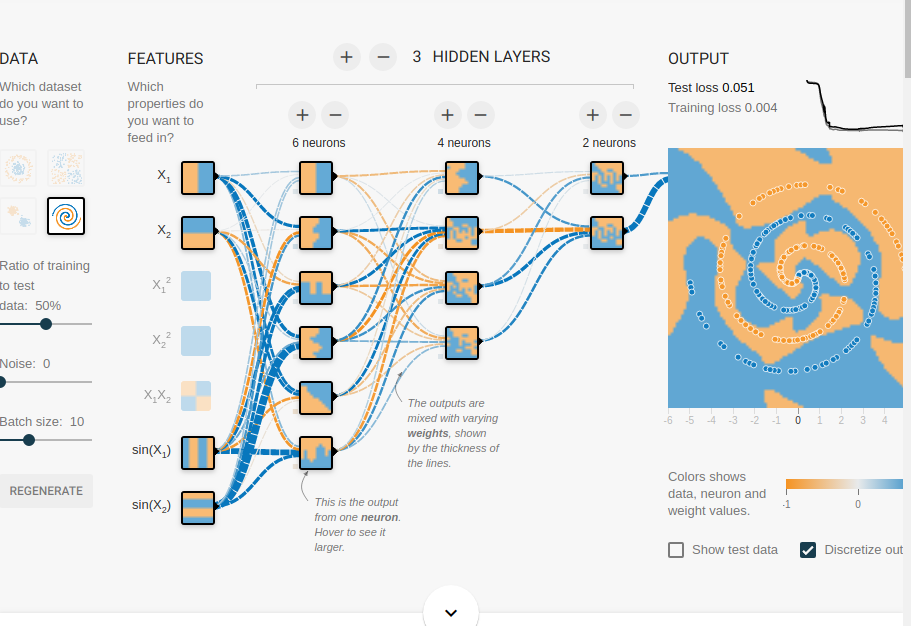

In [98]:
Image("q2_5.png")

# Question 3: Decision Trees (15 pts)

1. (5pts) In this question, we will learn to build a Decision Tree classifier. Load the q3_dataset.csv from the files. The column named 'label' is the $Y$ we are trying to predict using the features given in all other columns. As usual, we first split the data in a train and test set and build our model on train set and test the performance on the test set. Use the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to fit a model with default parameters and report its performance on the test data. Now, visualize the tree, for visualisation, if your classifier object is called clf, use the given commands to save the generated tree as a '.dot' file using export_graphviz(https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/) to generate the tree.


In [223]:
import pandas as pd
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

data= pd.read_csv('q3_dataset.csv')
print(data.shape)
print(data.columns)


(569, 31)
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'label'],
      dtype='object')


In [224]:
x = data.drop(['label'],axis=1)
y = data.label.values

In [256]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)


In [257]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("score :",dt.score(x_test,y_test))

score : 0.9385964912280702


2. (10pts) We can guide the learning of a Decision Tree classifier by specifying various parameters governing its construction. For example, the max_depth parameter forces the algorithm to stop after at most that many levels, the min_samples_split parameter lower bounds the amount of data required to split nodes when learning and the parameter called criterion determines what function to use to create splits at each node. For both type of criteria, gini and entropy, test the max_depth values in the range 1, 2, ..., 20 , and min_samples_split in the range $2^{5}, 2^{4}, ..., 2^{15}$. Visualise the best classification trees that you get for different criterion parameter and observe how do they differ. 

In [288]:
test_score=[]
score = 1
for depth in range(1,20):
    for n in range(2,16):
        dt = DecisionTreeClassifier(random_state=0, max_depth=depth,min_samples_split=2**n ,criterion='gini')
        dt.fit(x_train,y_train)
        score = dt.score(x_test,y_test)
        test_score.append(score)
        if(score > min(test_score)):
            best_model_gini = dt

In [289]:
print("score :",best_model_gini.score(x_test,y_test))

score : 0.9736842105263158


In [290]:
with open("_gini.dot", 'w') as f:
    f = tree.export_graphviz(best_model_gini, out_file=f)

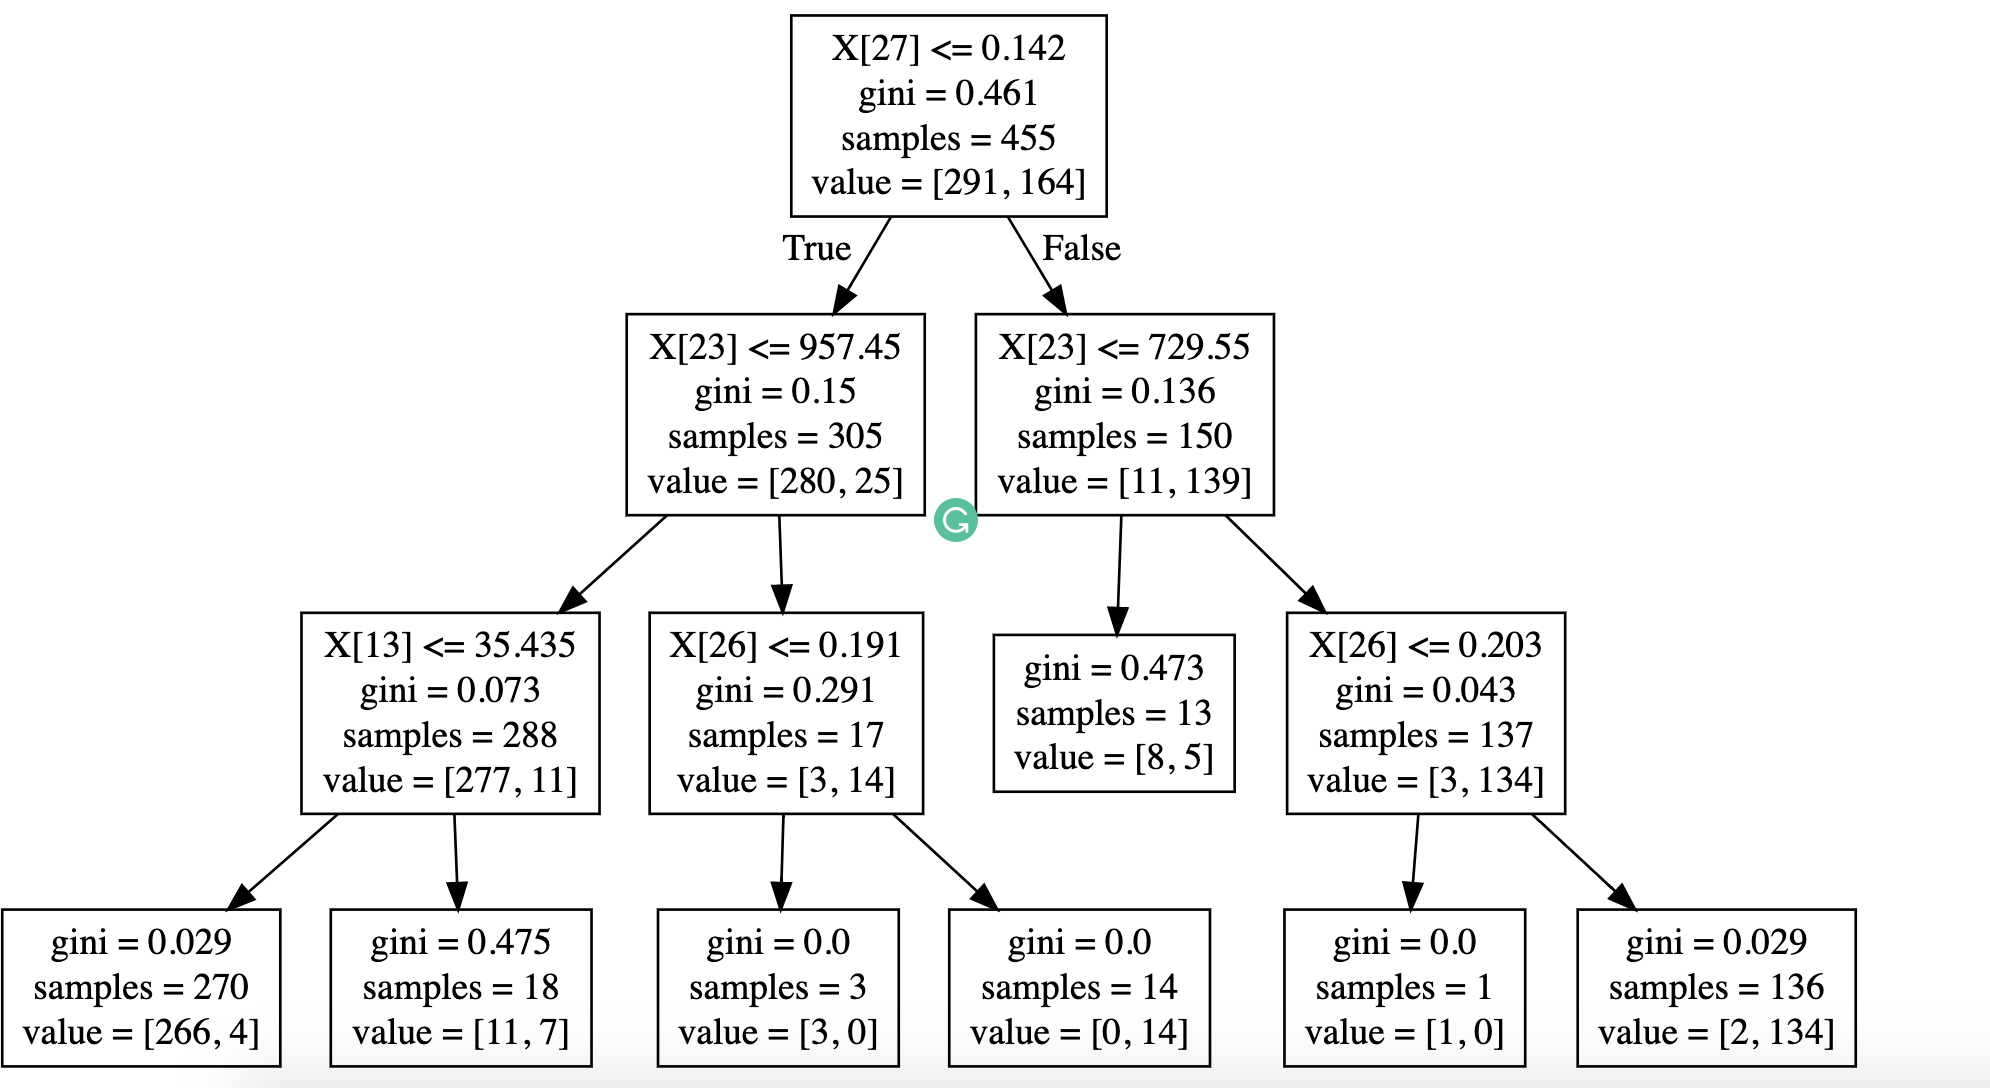

In [291]:
test_score=[]
score = 1
for depth in range(1,20):
    for n in range(2,16):
        dt = DecisionTreeClassifier(random_state=0, max_depth=depth,min_samples_split=2**n,criterion='entropy')
        dt.fit(x_train,y_train)
        score = dt.score(x_test,y_test)
        test_score.append(score)
        if(score > min(test_score)):
            best_model_entropy = dt

In [292]:
print("score :",best_model_entropy.score(x_test,y_test))

score : 0.8859649122807017


In [293]:
with open("_entropy.dot", 'w') as f2:
    f2 = tree.export_graphviz(best_model_entropy, out_file=f2)

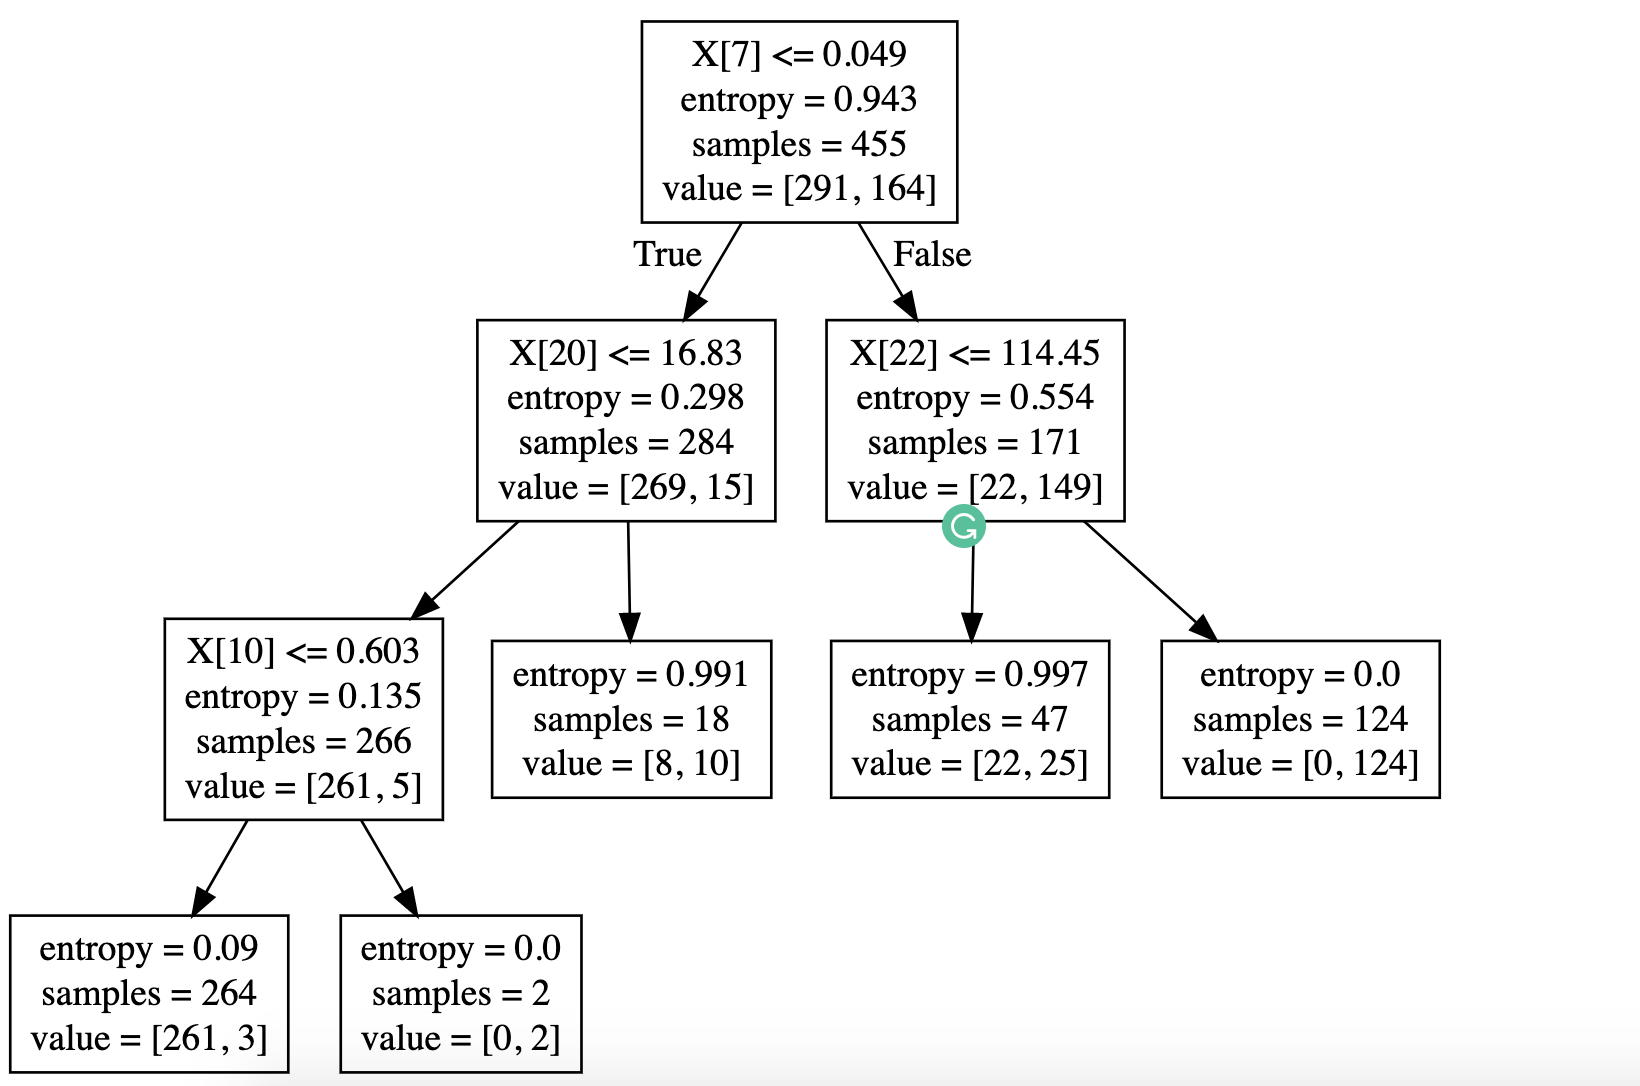

## Question 4: Bayes Optimal Classification (10 pts)

1. Example(5pts): Consider the following classification problem with only one input feature. We have two biased coins, coin 1 and 2. For coin 1, $P(heads) = p$ and for coin 2, $P(heads) = q$. We know that $p > q$. Given the output of a coin toss, we have to predict which coin was used for this toss. Assume we select both the coins for tossing with equal probability. What is the Bayes optimal classifier and what is its error rate?

Answer:
Since the choice of coin is equally likely to be 0 or 1, to minimize the probability of error we will predict the label for which the feature is most likely. Since $p > q$, $X = heads$ is more likely for $Y = 1$ and $X = tails$ is more likely for $Y = 2$. 

$$ f^{*}(x)=   \left\{
\begin{array}{ll}
      1 & \text{if }x = heads \\
      0 & otherwise \\
\end{array} 
\right.  $$


Baye's Risk $ = P(f(x) \neq f^{*}(x))= \frac{1}{2}(1-p) + \frac{1}{2}q$
